# Data Understanding

The data in this analysis is a from Zeraki School. It contains data of Form1 -Form4 students, their Admission numbers, stream, the marks and grades they got in different subjects for different exams. (Cat 1, end term and premock for form 4)

The subject Analysis was done using mean marks as the ranking criteria as mean points would have resulted to ties due to the huge number of students



In [1]:
#These are the Libraries I will use to to do the analysis:
    
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


import re ## The regular expression module for removing 
           #patterns in subject marks for all students e.g grades and - or + in grades for numerical computing

## Data Pre-processing

## FORM 4 Pre-Mock AnaLysis

In [2]:
# Creating a form 4 Premock Dataframe for tabular analysis

form4_df=pd.read_excel("~/Desktop/exam_analysis/School_data/f4 t2 pre-mock_V2-edit.xls")

form4_df.tail()



,STREAM,ADMNO,NAME,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
330,NORTH,6741,NaN,28 E,32 C,28 E,34 D-,NaN,30 D-,33 E,NaN,50 D,NaN,NaN,35 D,NaN,NaN,NaN,NaN,NaN
331,ALPHA,6780,NaN,32 D-,31 D,20 E,26 E,NaN,28 E,NaN,37 D,50 D,29 C-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,EAST,6818,NaN,27 E,15 D-,23 E,31 D-,NaN,23 E,NaN,30 D-,31 C-,29 D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,CENTRAL,6631,NaN,X,X,X,X,NaN,X,NaN,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,WEST,6713,NaN,17 E,38 C+,0 D-,X,X,18 E,NaN,NaN,33 D-,NaN,NaN,47 C-,NaN,NaN,NaN,NaN,NaN


### Removing the name column is it does not have any

###  values and admission numbers since they dont have much relevance in the overall analysis

In [3]:
form4_df.drop(columns=["ADMNO", "NAME"], inplace =True)

form4_df.head()


,STREAM,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
0,WEST,58 C+,53 B+,77 A-,66 B,77 A-,66 B,NaN,NaN,79 A-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83 A
1,WEST,56 C+,48 A,81 A-,63 B-,NaN,70 B+,NaN,71 A-,76 A-,NaN,NaN,NaN,NaN,82 A,NaN,NaN,NaN
2,EAST,47 C-,59 A-,89 A,69 B,71 B+,70 B+,NaN,NaN,65 B+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80 A-
3,WEST,56 C+,51 B-,97 A,50 C,76 A-,71 B+,NaN,67 B+,75 A-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CENTRAL,55 C+,59 A,67 B,65 B,66 B,65 B,NaN,75 A,77 A-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

# Function to count grades in all the subjects
def count_grades(column):
    grade_counts = {}

    for entry in column:
        if isinstance(entry, str):
            # Splitting the entry into grade and the rest
            parts = entry.split()
            
            if len(parts) == 2:
                grade = parts[1]
                if grade in grade_counts:
                    grade_counts[grade] += 1
                else:
                    grade_counts[grade] = 1

    return grade_counts


# Looping through the columns (excluding non-numeric columns like 'STREAM')
for column in form4_df.columns[1:]:
    grade_counts = count_grades(form4_df[column])
    print(f"Column: {column}")
    for grade, count in grade_counts.items():
        print(f"{grade}: {count}")

Column: ENG
C+: 34
C-: 96
B-: 7
C: 64
D+: 80
D: 40
D-: 10
E: 3
Column: KIS
B+: 27
A: 8
A-: 22
B-: 54
C+: 52
B: 50
C: 45
D+: 17
X: 2
C-: 33
D-: 4
D: 18
E: 2
Column: MAT
A-: 18
A: 10
B: 32
B+: 17
C: 40
C+: 37
B-: 45
C-: 30
D-: 20
E: 29
D: 22
D+: 34
Column: BIO
B: 8
B-: 23
C: 69
B+: 2
C+: 40
A-: 1
C-: 60
D+: 61
D: 33
D-: 27
E: 9
Column: PHY
A-: 4
B+: 5
B: 9
B-: 23
C: 26
C+: 30
D+: 16
C-: 28
D: 15
D-: 6
E: 1
Column: CHE
B: 11
B+: 6
C+: 31
B-: 28
C: 58
C-: 42
D+: 55
D: 43
D-: 24
E: 36
Column: HIS
C: 15
B: 8
C-: 16
B-: 9
D+: 10
A-: 2
C+: 18
D-: 6
D: 8
E: 5
B+: 1
Column: GEO
A-: 8
B+: 11
A: 24
B: 12
C+: 25
B-: 17
X: 10
C: 17
C-: 8
D+: 3
D: 2
D-: 1
Column: CRE
A-: 28
B+: 36
B: 47
C+: 46
B-: 67
A: 6
X: 2
C: 49
C-: 29
E: 5
D-: 5
D+: 11
D: 3
Column: HSC
A-: 1
B: 3
D: 6
C+: 8
B-: 1
C-: 6
C: 1
B+: 1
D+: 1
Column: AD
A-: 1
B: 3
B-: 5
C+: 3
D: 1
Column: AGR
C: 5
C+: 6
B+: 1
D+: 14
C-: 11
D: 7
D-: 3
Column: COM
A-: 7
A: 5
C: 2
B-: 8
B: 11
C+: 3
D+: 1
Column: FRE
A: 1
B+: 4
A-: 2
B-: 2
C: 5
B: 10
C+: 3

In [5]:
columns_to_clean = ["ENG", "KIS", "MAT", "BIO", "PHY", "CHE", "HIS", "GEO", "CRE", "HSC", "AD", "AGR", "COM", "FRE", "GER", "MUS", "BST"]
 
grade_pattern = r'[A-Za-z]+'


for column in columns_to_clean:
    form4_df[column] = form4_df[column].apply(lambda x: re.sub(grade_pattern, '', str(x)))


# Defining a regular expression pattern to match '+' and '-' signs in the grades

plus_minus_pattern = r'[-+]'

for column in columns_to_clean:
    form4_df[column] = form4_df[column].str.replace(plus_minus_pattern, '', regex=True)

# the FORM 4 Dataframe contains the values with both letter grades and '+' and '-' removed in the specified columns

form4_df.head(10)

,STREAM,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
0,WEST,58,53,77,66,77,66,,,79,,,,,,,,83
1,WEST,56,48,81,63,,70,,71,76,,,,,82,,,
2,EAST,47,59,89,69,71,70,,,65,,,,,,,,80
3,WEST,56,51,97,50,76,71,,67,75,,,,,,,,
4,CENTRAL,55,59,67,65,66,65,,75,77,,,,,,,,
5,NORTH,62,52,77,54,,56,,83,70,,,,,,,,79
6,ALPHA,58,52,73,70,63,71,,74,70,,,,,,,,
7,ALPHA,61,52,79,54,70,71,,69,71,,,,,,,,
8,WEST,55,58,71,65,64,70,,,73,,,51,,,,,
9,ALPHA,55,45,67,72,63,59,,70,75,,,,,,,,


### Function for Calculating Subject mean

In [6]:


def calculate_subject_means(form4_df, subject_columns):
   
    subject_means = {}
    
    for subject_column in subject_columns:
        # Converting the subject column to numeric, forcing non-numeric values to NaN (Null values)
        form4_df[subject_column] = pd.to_numeric(form4_df[subject_column], errors='coerce')

        # Calculating the mean of the subject column, excluding NaN values
        subject_mean = form4_df[subject_column].mean()
        
        # Storing the subject mean in the dictionary
        subject_means[subject_column] = subject_mean

    return subject_means



# Specifying the subject columns for which I want to calculate mean

subject_columns = ["ENG","KIS","MAT", "BIO","PHY", "CHE", "HIS", "GEO", "CRE", "HSC", "AD", "AGR",
                   "COM", "FRE", "GER", "MUS", "BST"]

# Calculatinf the mean of the specified subject columns using the function
subject_means = calculate_subject_means(form4_df, subject_columns)


for subject, mean in subject_means.items():
    print(f"Mean {subject}: {mean}")


Mean ENG: 46.221556886227546
Mean KIS: 42.83532934131737
Mean MAT: 53.16766467065868
Mean BIO: 47.2012012012012
Mean PHY: 52.11042944785276
Mean CHE: 45.42215568862275
Mean HIS: 53.724489795918366
Mean GEO: 58.88405797101449
Mean CRE: 62.308383233532936
Mean HSC: 40.857142857142854
Mean AD: 61.15384615384615
Mean AGR: 45.57446808510638
Mean COM: 50.91891891891892
Mean FRE: 63.166666666666664
Mean GER: 54.4
Mean MUS: 58.214285714285715
Mean BST: 61.75


## FORM ONE

In [7]:
## combining all Form One 2015 Data

Form_1_2015=["~/Desktop/exam_analysis/School_data/f1 t1 2015_V2-edit.xls", "~/Desktop/exam_analysis/School_data/f1 t2 2015_V2-edit.xls", "~/Desktop/exam_analysis/School_data/f1 t3 2015_V2-edit.xls"]

## Creating an empty list where the merged form 1 2015 data will be appended

m_dfs=[]

In [8]:
# Iterating through all form 1 students to be merged into one dataframe

for form_1 in Form_1_2015:
    F1_2015_df=pd.read_excel(form_1)
    m_dfs.append(F1_2015_df)
    
merged_f1_2015=pd.concat(m_dfs, ignore_index=True)

merged_f1_2015.head(10)

,STREAM,ADMNO,NAME,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
0,NORTH,6848,NaN,78 A-,80 A,94 A,92 A,96 A,86 A,85 A,95 A,89 A,94 A,NaN,NaN,84 A,NaN,NaN,NaN,89 A
1,EAST,6862,NaN,70 B+,77 A-,83 A,94 A,98 A,90 A,84 A,91 A,92 A,NaN,NaN,98 A,92 A,NaN,NaN,NaN,86 A
2,ALPHA,6732,NaN,75 A-,73 B+,83 A,95 A,86 A,91 A,90 A,93 A,86 A,90 A,NaN,NaN,93 A,NaN,NaN,NaN,82 A
3,SOUTH,6790,NaN,73 B+,90 A,83 A,90 A,89 A,78 A-,95 A,85 A,84 A,83 A,NaN,NaN,92 A,NaN,NaN,NaN,86 A
4,SOUTH,6808,NaN,67 B,78 A-,80 A,98 A,97 A,91 A,88 A,94 A,92 A,92 A,NaN,NaN,96 A,NaN,NaN,80 A,NaN
5,ALPHA,6833,NaN,71 B+,71 B+,84 A,94 A,91 A,92 A,93 A,93 A,91 A,NaN,NaN,97 A,81 A,NaN,NaN,NaN,89 A
6,ALPHA,6884,NaN,74 B+,78 A-,89 A,89 A,88 A,93 A,82 A,95 A,86 A,79 A-,NaN,NaN,88 A,NaN,NaN,NaN,87 A
7,NaN,6660,NaN,73 B+,79 A-,75 A-,89 A,89 A,90 A,87 A,95 A,87 A,83 A,NaN,NaN,83 A,NaN,80 A,NaN,NaN
8,ALPHA,6720,NaN,71 B+,83 A,83 A,93 A,80 A,88 A,89 A,90 A,79 A-,89 A,NaN,NaN,80 A,NaN,79 A-,NaN,NaN
9,SOUTH,6876,NaN,67 B,80 A,80 A,92 A,93 A,86 A,78 A-,89 A,80 A,87 A,NaN,NaN,93 A,NaN,84 A,NaN,NaN


### Counting Grades in all subjects

In [9]:


# Function to count grades in all the subjects
def count_grades(column):
    grade_counts = {}

    for entry in column:
        if isinstance(entry, str):
            # Splitting the entry into grade and the rest
            parts = entry.split()
            
            if len(parts) == 2:
                grade = parts[1]
                if grade in grade_counts:
                    grade_counts[grade] += 1
                else:
                    grade_counts[grade] = 1

    return grade_counts


# Looping through the columns (excluding non-numeric columns like 'STREAM')
for column in merged_f1_2015.columns[1:]:
    grade_counts = count_grades(merged_f1_2015[column])
    print(f"Column: {column}")
    for grade, count in grade_counts.items():
        print(f"{grade}: {count}")



Column: ADMNO
Column: NAME
Column: ENG
A-: 34
B+: 98
B: 175
A: 8
B-: 241
C+: 197
C: 137
C-: 67
D+: 34
D: 7
D-: 4
E: 2
Y: 1
Column: KIS
A: 17
A-: 47
B+: 124
B: 160
C: 125
C+: 187
B-: 198
D+: 31
C-: 87
D: 19
D-: 6
E: 2
Column: MAT
A: 244
A-: 98
B-: 103
B+: 124
B: 137
C+: 92
C: 78
D+: 37
C-: 53
D: 18
D-: 15
E: 7
Column: BIO
A: 329
B+: 123
A-: 81
B: 86
B-: 106
C+: 88
C: 80
C-: 54
D: 18
D+: 21
D-: 13
E: 8
Column: PHY
A: 282
A-: 88
B+: 111
B: 79
B-: 111
C+: 60
C: 80
C-: 48
D: 37
D+: 55
D-: 30
E: 23
Column: CHE
A: 326
A-: 193
B+: 186
B: 121
B-: 80
C+: 42
D+: 9
C: 26
C-: 16
D: 3
D-: 1
Y: 1
Column: HIS
A: 187
A-: 166
B: 154
B+: 168
C+: 89
B-: 135
C: 49
C-: 28
D+: 11
D-: 6
D: 9
X: 1
Y: 1
E: 1
Column: GEO
A: 317
A-: 151
B: 101
B+: 154
C+: 91
B-: 95
C-: 24
C: 47
D+: 16
D: 4
D-: 4
E: 1
Column: CRE
A: 269
A-: 194
B: 155
B+: 185
C+: 51
B-: 107
C: 24
C-: 16
D-: 1
D+: 4
Column: HSC
A: 166
A-: 102
B+: 89
B-: 67
B: 56
C: 42
C+: 52
C-: 24
D-: 1
D: 8
D+: 14
Column: AD
B+: 15
B: 11
A-: 6
B-: 12
C+: 17
C-: 6

### Removing the name column is it does not have any values and admission number since they dont have much relevance in the overall analysis

In [10]:
#Dropping NAME and ADMNo Columns

merged_f1_2015.drop(columns=["NAME", "ADMNO",], inplace = True)

merged_f1_2015.head(10)

,STREAM,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
0,NORTH,78 A-,80 A,94 A,92 A,96 A,86 A,85 A,95 A,89 A,94 A,NaN,NaN,84 A,NaN,NaN,NaN,89 A
1,EAST,70 B+,77 A-,83 A,94 A,98 A,90 A,84 A,91 A,92 A,NaN,NaN,98 A,92 A,NaN,NaN,NaN,86 A
2,ALPHA,75 A-,73 B+,83 A,95 A,86 A,91 A,90 A,93 A,86 A,90 A,NaN,NaN,93 A,NaN,NaN,NaN,82 A
3,SOUTH,73 B+,90 A,83 A,90 A,89 A,78 A-,95 A,85 A,84 A,83 A,NaN,NaN,92 A,NaN,NaN,NaN,86 A
4,SOUTH,67 B,78 A-,80 A,98 A,97 A,91 A,88 A,94 A,92 A,92 A,NaN,NaN,96 A,NaN,NaN,80 A,NaN
5,ALPHA,71 B+,71 B+,84 A,94 A,91 A,92 A,93 A,93 A,91 A,NaN,NaN,97 A,81 A,NaN,NaN,NaN,89 A
6,ALPHA,74 B+,78 A-,89 A,89 A,88 A,93 A,82 A,95 A,86 A,79 A-,NaN,NaN,88 A,NaN,NaN,NaN,87 A
7,NaN,73 B+,79 A-,75 A-,89 A,89 A,90 A,87 A,95 A,87 A,83 A,NaN,NaN,83 A,NaN,80 A,NaN,NaN
8,ALPHA,71 B+,83 A,83 A,93 A,80 A,88 A,89 A,90 A,79 A-,89 A,NaN,NaN,80 A,NaN,79 A-,NaN,NaN
9,SOUTH,67 B,80 A,80 A,92 A,93 A,86 A,78 A-,89 A,80 A,87 A,NaN,NaN,93 A,NaN,84 A,NaN,NaN


## Removing the grades from the numerical marks

### The assumption is that they affect python  in getting the mean marks since they are categorical values and not numerical

### the grades will be added later

In [11]:

columns_to_clean = ["ENG", "KIS", "MAT", "BIO", "PHY", "CHE", "HIS", "GEO", "CRE", "HSC", "AD", "AGR", "COM", "FRE", "GER", "MUS", "BST"]
 
grade_pattern = r'[A-Za-z]+'


for column in columns_to_clean:
    merged_f1_2015[column] = merged_f1_2015[column].apply(lambda x: re.sub(grade_pattern, '', str(x)))

# Now merged_f1_2015 contains the marks only but no grades

merged_f1_2015.head(7)

,STREAM,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
0,NORTH,78 -,80,94,92,96,86,85,95,89,94,,,84,,,,89
1,EAST,70 +,77 -,83,94,98,90,84,91,92,,,98,92,,,,86
2,ALPHA,75 -,73 +,83,95,86,91,90,93,86,90,,,93,,,,82
3,SOUTH,73 +,90,83,90,89,78 -,95,85,84,83,,,92,,,,86
4,SOUTH,67,78 -,80,98,97,91,88,94,92,92,,,96,,,80,
5,ALPHA,71 +,71 +,84,94,91,92,93,93,91,,,97,81,,,,89
6,ALPHA,74 +,78 -,89,89,88,93,82,95,86,79 -,,,88,,,,87


In [12]:

# Defining a regular expression pattern to match '+' and '-' signs inthe grades
# The r' below is the raw string literal notation for ensuring that + and - in 
# grades are treated as literal values and not as operators so tht the code runs

plus_minus_pattern = r'[-+]'

for column in columns_to_clean:
    merged_f1_2015[column] = merged_f1_2015[column].str.replace(plus_minus_pattern, '', regex=True)

# Now merged_f1_2015 contains the values with both letter grades and '+' and '-' removed in the specified columns
merged_f1_2015.head(10)

,STREAM,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
0,NORTH,78,80,94,92,96,86,85,95,89,94,,,84,,,,89
1,EAST,70,77,83,94,98,90,84,91,92,,,98,92,,,,86
2,ALPHA,75,73,83,95,86,91,90,93,86,90,,,93,,,,82
3,SOUTH,73,90,83,90,89,78,95,85,84,83,,,92,,,,86
4,SOUTH,67,78,80,98,97,91,88,94,92,92,,,96,,,80,
5,ALPHA,71,71,84,94,91,92,93,93,91,,,97,81,,,,89
6,ALPHA,74,78,89,89,88,93,82,95,86,79,,,88,,,,87
7,NaN,73,79,75,89,89,90,87,95,87,83,,,83,,80,,
8,ALPHA,71,83,83,93,80,88,89,90,79,89,,,80,,79,,
9,SOUTH,67,80,80,92,93,86,78,89,80,87,,,93,,84,,


In [13]:


def calculate_subject_means(merged_f1_2015, subject_columns):
     ## This function returns A dictionary where keys are subject names and values are their means.
    
    subject_means = {}
    
    for subject_column in subject_columns:
        # Converting the subject column to numeric, forcing non-numeric values to NaN
        merged_f1_2015[subject_column] = pd.to_numeric(merged_f1_2015[subject_column], errors='coerce')

        # Calculating the mean of the subject column, excluding NaN values
        subject_mean = merged_f1_2015[subject_column].mean()
        
        # Storing the subject mean in the dictionary
        subject_means[subject_column] = subject_mean

    return subject_means



# Specifying the subject columns for which I want to calculate the mean

subject_columns = ["ENG","KIS","MAT", "BIO","PHY", "CHE", "HIS", "GEO", "CRE", "HSC", "AD", "AGR",
                   "COM", "FRE", "GER", "MUS", "BST"]

# Calculating the mean of the specified subject columns using the function
subject_means = calculate_subject_means(merged_f1_2015, subject_columns)

for subject, mean in subject_means.items():
    print(f"Mean {subject}: {mean}")


Mean ENG: 61.82388059701493
Mean KIS: 60.123629112662016
Mean MAT: 66.58151093439363
Mean BIO: 70.12909632571996
Mean PHY: 64.20318725099601
Mean CHE: 66.79482071713147
Mean HIS: 68.83482587064677
Mean GEO: 73.53731343283582
Mean CRE: 71.88270377733599
Mean HSC: 67.22222222222223
Mean AD: 63.45918367346939
Mean AGR: 77.76491228070175
Mean COM: 73.46819085487077
Mean FRE: 68.62433862433862
Mean GER: 65.10285714285715
Mean MUS: 55.67883211678832
Mean BST: 68.34920634920636


## FORM 2

In [14]:
## combining all Form two Data

Form_2_2017=["~/Desktop/exam_analysis/School_data/f2 t1 2017_V2-edit.xls", "~/Desktop/exam_analysis/School_data/f2 t2 2017_V2-edit.xls", "~/Desktop/exam_analysis/School_data/f2 t3 2017_V2-edit.xls"]

## Creating an empty list where the merged form 2 2017 data will be appended

m_2017_dfs=[]

In [15]:
# Iterating through all form 2 students to be merged into one dataframe

for form_2 in Form_2_2017:
    F2_2017_df=pd.read_excel(form_2)
    m_2017_dfs.append(F2_2017_df)
    
merged_f2_2017=pd.concat(m_2017_dfs, ignore_index=True)

merged_f2_2017.head(10)

,STREAM,ADMNO,NAME,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
0,EAST,6977,NaN,67 B+,65 A-,77 A,91 A,91 A,89 A,NaN,NaN,85 A,NaN,NaN,NaN,93 A,NaN,NaN,NaN,NaN
1,WEST,7112,NaN,63 B+,78 A,89 A,89 A,80 A-,82 A,NaN,93 A,85 A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EAST,7259,NaN,71 B+,70 A,76 A-,93 A,88 A-,85 A,96 A,NaN,89 A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EAST,7193,NaN,66 B+,67 A-,88 B+,92 A,88 A-,87 A,NaN,NaN,85 A,NaN,NaN,NaN,NaN,84 A,NaN,NaN,NaN
4,ALPHA,7035,NaN,70 B+,70 A,78 A-,86 A,71 B+,87 A-,88 A,NaN,83 A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,EAST,7013,NaN,79 A-,74 A,71 B,95 A,78 B+,76 A-,NaN,NaN,89 A,NaN,NaN,NaN,93 A,NaN,NaN,NaN,NaN
6,EAST,7025,NaN,72 B+,67 A-,71 B,92 A,NaN,82 A-,90 A,NaN,90 A,NaN,NaN,NaN,NaN,83 A,NaN,NaN,NaN
7,ALPHA,7179,NaN,67 B+,60 B+,71 A-,78 A,96 A-,77 A-,NaN,NaN,77 A,NaN,NaN,NaN,91 A,NaN,NaN,NaN,NaN
8,EAST,7043,NaN,74 A-,75 A-,79 B,88 A,NaN,76 A-,90 A,NaN,79 A-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80 A
9,EAST,7217,NaN,66 B,65 A-,65 B,92 A,NaN,92 A-,91 A,NaN,88 A,NaN,NaN,NaN,NaN,NaN,79 A,NaN,NaN


In [16]:


# Function to count grades in a column
def count_grades(column):
    grade_counts = {}

    for entry in column:
        if isinstance(entry, str):
            
            parts = entry.split()
            
            if len(parts) == 2:
                grade = parts[1]
                if grade in grade_counts:
                    grade_counts[grade] += 1
                else:
                    grade_counts[grade] = 1

    return grade_counts


# Looping through the columns (excluding non-numeric columns like 'STREAM')
for column in merged_f2_2017.columns[1:]:
    grade_counts = count_grades(merged_f2_2017[column])
    print(f"Column: {column}")
    for grade, count in grade_counts.items():
        print(f"{grade}: {count}")



Column: ADMNO
Column: NAME
Column: ENG
B+: 217
A-: 117
B: 217
B-: 225
C: 67
C+: 112
D+: 8
C-: 23
D: 1
A: 33
X: 1
Column: KIS
A-: 223
A: 71
B+: 240
B: 180
B-: 137
C+: 80
C: 50
D: 7
D+: 8
C-: 19
D-: 3
X: 1
Column: MAT
A: 80
A-: 60
B+: 80
B: 105
B-: 125
C+: 99
C-: 113
C: 111
D+: 85
D: 59
D-: 43
E: 62
X: 1
Column: BIO
A: 170
A-: 148
B+: 128
B: 158
B-: 144
C+: 86
C: 68
C-: 47
D+: 34
D: 20
D-: 13
E: 6
X: 1
Column: PHY
A: 52
A-: 52
B+: 69
B: 69
B-: 71
C+: 39
C: 35
C-: 17
D+: 13
D: 5
D-: 7
E: 4
X: 1
Column: CHE
A: 78
A-: 87
B+: 99
B: 115
B-: 137
C+: 121
C: 121
C-: 86
D+: 75
D-: 34
D: 47
E: 21
X: 1
Column: HIS
A: 197
A-: 114
B+: 86
B: 69
B-: 44
C+: 21
C: 19
C-: 8
D+: 5
D-: 2
E: 4
D: 1
X: 1
Column: GEO
A: 29
A-: 40
B: 38
B+: 25
B-: 28
C+: 22
C: 17
C-: 7
E: 3
D+: 2
D-: 1
Column: CRE
A: 340
A-: 234
B+: 190
B: 142
B-: 72
C+: 27
C: 10
C-: 6
D+: 1
X: 1
Column: HSC
A-: 3
B: 8
B-: 8
C: 9
C-: 7
D+: 2
C+: 11
B+: 6
A: 1
Column: AD
B+: 18
A: 3
A-: 14
B: 9
B-: 2
C: 1
Column: AGR
A: 105
A-: 33
B+: 16
B: 17
B

In [17]:

columns_to_clean = ["ENG", "KIS", "MAT", "BIO", "PHY", "CHE", "HIS", "GEO", "CRE", "HSC", "AD", "AGR", "COM", "FRE", "GER", "MUS", "BST"]
 
grade_pattern = r'[A-Za-z]+'


for column in columns_to_clean:
    merged_f2_2017[column] = merged_f2_2017[column].apply(lambda x: re.sub(grade_pattern, '', str(x)))

# Now merged_f2_2017 contains the marks only but no grades

merged_f2_2017

,STREAM,ADMNO,NAME,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
0,EAST,6977,NaN,67 +,65 -,77,91,91,89,,,85,,,,93,,,,
1,WEST,7112,NaN,63 +,78,89,89,80 -,82,,93,85,,,,,,,,
2,EAST,7259,NaN,71 +,70,76 -,93,88 -,85,96,,89,,,,,,,,
3,EAST,7193,NaN,66 +,67 -,88 +,92,88 -,87,,,85,,,,,84,,,
4,ALPHA,7035,NaN,70 +,70,78 -,86,71 +,87 -,88,,83,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,ALPHA,7065,NaN,24 +,0,12,35,,0,38 -,,0 +,,,0 +,,,,,
1021,NORTH,7228,NaN,33,25,11,36 -,,27 -,,37 -,50 -,,,,45 +,,,,
1022,CENTRAL,7288,NaN,34,27,20,45 -,,34 -,39 +,,48,,,,50 -,,,,
1023,CENTRAL,7240,NaN,31,27 -,4,14,,9,28,,45 -,,,32,,,,,


In [18]:

# Defining a regular expression pattern to match '+' and '-' signs inthe grades
plus_minus_pattern = r'[-+]'

for column in columns_to_clean:
    merged_f2_2017[column] = merged_f2_2017[column].str.replace(plus_minus_pattern, '', regex=True)

# Now merged_f2_2017 contains the values with both letter grades and '+' and '-' removed in the specified columns
merged_f2_2017.head(8)

,STREAM,ADMNO,NAME,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
0,EAST,6977,NaN,67,65,77,91,91,89,,,85,,,,93,,,,
1,WEST,7112,NaN,63,78,89,89,80,82,,93,85,,,,,,,,
2,EAST,7259,NaN,71,70,76,93,88,85,96,,89,,,,,,,,
3,EAST,7193,NaN,66,67,88,92,88,87,,,85,,,,,84,,,
4,ALPHA,7035,NaN,70,70,78,86,71,87,88,,83,,,,,,,,
5,EAST,7013,NaN,79,74,71,95,78,76,,,89,,,,93,,,,
6,EAST,7025,NaN,72,67,71,92,,82,90,,90,,,,,83,,,
7,ALPHA,7179,NaN,67,60,71,78,96,77,,,77,,,,91,,,,


In [19]:


def calculate_subject_means(merged_f2_2017, subject_columns):
  
    subject_means = {}
    
    for subject_column in subject_columns:
        # Converting the subject column to numeric, forcinf non-numeric values to NaN
        merged_f2_2017[subject_column] = pd.to_numeric(merged_f2_2017[subject_column], errors='coerce')

        # Calculating the mean of the subject column, excluding NaN values
        subject_mean = merged_f2_2017[subject_column].mean()
        
        # Storing the subject mean in the dictionary
        subject_means[subject_column] = subject_mean

    return subject_means



# Specifying the subject columns for which I want to calculate mean

subject_columns = ["ENG","KIS","MAT", "BIO","PHY", "CHE", "HIS", "GEO", "CRE", "HSC", "AD", "AGR",
                   "COM", "FRE", "GER", "MUS", "BST"]

# Calculating the mean of the specified subject columns using the function

subject_means = calculate_subject_means(merged_f2_2017, subject_columns)


for subject, mean in subject_means.items():
    print(f"Mean {subject}: {mean}")


Mean ENG: 58.72673849167483
Mean KIS: 63.38370951913641
Mean MAT: 53.158357771260995
Mean BIO: 60.70283479960899
Mean PHY: 61.56221198156682
Mean CHE: 58.51565557729941
Mean HIS: 69.29772329246936
Mean GEO: 63.278301886792455
Mean CRE: 69.05865102639297
Mean HSC: 61.8
Mean AD: 64.36170212765957
Mean AGR: 69.03125
Mean COM: 71.27397260273973
Mean FRE: 61.054794520547944
Mean GER: 61.94845360824742
Mean MUS: 54.0
Mean BST: 70.41397849462365


## FORM 3

In [20]:
## combining all Form Three Data

Form_3_2017=["~/Desktop/exam_analysis/School_data/f3 t1 2017_V3-edit.xls", "~/Desktop/exam_analysis/School_data/f3 t2 2017_V2-edit.xls", "~/Desktop/exam_analysis/School_data/f3 t3 2017_V2-edit.xls"]

## Creating an empty list where the merged form 3 2017 data will be appended

f3_dfs=[]

In [21]:
# Iterating through all form 3 students to be merged into one dataframe

for form_3 in Form_3_2017:
    F3_2017_df=pd.read_excel(form_3)
    f3_dfs.append(F3_2017_df)
    
merged_f3_2017=pd.concat(f3_dfs, ignore_index=True)

merged_f3_2017.head(8)

,STREAM,ADMNO,NAME,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
0,ALPHA,6732,NaN,77 A-,70 B+,71 B+,77 A-,75 A-,72 B+,NaN,65 B,63 B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EAST,6947,NaN,63 B-,67 B,82 A,82 A,58 C+,80 A-,NaN,NaN,56 C+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83 A
2,ALPHA,6833,NaN,74 B+,60 B-,88 A,80 A-,70 B+,78 A-,NaN,NaN,70 B+,NaN,NaN,NaN,84 A,NaN,NaN,NaN,NaN
3,WEST,6743,NaN,69 B,63 B-,88 A,66 B,65 B,77 A-,NaN,47 C-,61 B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SOUTH,6820,NaN,70 B+,54 C,73 B+,69 B,68 B,71 B+,NaN,57 C+,67 B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SOUTH,6724,NaN,73 B+,68 B,90 A,84 A,51 C,75 A-,NaN,65 B,62 B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,WEST,6827,NaN,70 B+,76 A-,75 A-,71 B+,64 B-,66 B,NaN,NaN,66 B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82 A
7,ALPHA,6744,NaN,77 A-,66 B,84 A,67 B,65 B,72 B+,NaN,60 B-,55 C+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:


# Function to count grades in a column
def count_grades(column):
    grade_counts = {}

    for entry in column:
        if isinstance(entry, str):
            # Spliting the entry into grade and the rest
            parts = entry.split()
            
            if len(parts) == 2:
                grade = parts[1]
                if grade in grade_counts:
                    grade_counts[grade] += 1
                else:
                    grade_counts[grade] = 1

    return grade_counts


# Looping through the columns (excluding non-numeric columns like 'STREAM')
for column in merged_f3_2017.columns[1:]:
    grade_counts = count_grades(merged_f3_2017[column])
    print(f"Column: {column}")
    for grade, count in grade_counts.items():
        print(f"{grade}: {count}")



Column: ADMNO
Column: NAME
Column: ENG
A-: 16
B-: 205
B+: 49
B: 130
C+: 175
C: 192
C-: 105
A: 2
D+: 83
D: 32
E: 3
D-: 14
Column: KIS
B+: 105
B: 177
B-: 233
C: 145
A-: 16
A: 3
C+: 197
C-: 77
D+: 30
D: 18
E: 1
D-: 4
Column: MAT
B+: 70
A: 22
A-: 41
C+: 92
B-: 106
B: 60
C: 140
C-: 116
D: 74
D-: 63
D+: 119
E: 103
Column: BIO
A-: 31
A: 13
B: 98
B+: 71
B-: 165
C: 149
C+: 181
C-: 130
D+: 81
D-: 22
D: 48
E: 15
Y: 2
Column: PHY
A-: 13
C+: 62
B+: 28
B: 43
C: 83
B-: 56
C-: 63
D+: 55
A: 20
D: 35
D-: 18
E: 15
Column: CHE
B+: 66
A-: 44
B: 83
B-: 135
A: 11
C+: 110
C: 153
D+: 103
C-: 118
D: 64
D-: 58
E: 60
Column: HIS
A: 68
A-: 64
B+: 56
B-: 26
B: 38
C: 10
C+: 23
D: 2
D+: 5
Column: GEO
B: 51
C-: 35
C+: 29
B-: 57
C: 44
B+: 47
D: 19
D+: 27
D-: 22
E: 14
A: 41
A-: 31
Y: 2
Column: CRE
B-: 152
C+: 126
B+: 131
B: 137
C: 128
A-: 99
C-: 81
D+: 58
D: 22
D-: 17
E: 7
A: 48
Column: HSC
B+: 5
B-: 19
B: 12
C: 14
A-: 5
C+: 16
D+: 8
C-: 7
D-: 2
E: 1
D: 1
Column: AD
A: 2
A-: 4
B-: 9
B: 7
C+: 7
D+: 2
C-: 1
B+: 3
C: 2
Col

In [23]:

columns_to_clean = ["ENG", "KIS", "MAT", "BIO", "PHY", "CHE", "HIS", "GEO", "CRE", "HSC", "AD", "AGR", "COM", "FRE", "GER", "MUS", "BST"]
 
grade_pattern = r'[A-Za-z]+'


for column in columns_to_clean:
    merged_f3_2017[column] = merged_f3_2017[column].apply(lambda x: re.sub(grade_pattern, '', str(x)))

# Now merged_f3_2017 contains the marks only but no grades

merged_f3_2017

,STREAM,ADMNO,NAME,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
0,ALPHA,6732,NaN,77 -,70 +,71 +,77 -,75 -,72 +,,65,63 -,,,,,,,,
1,EAST,6947,NaN,63 -,67,82,82,58 +,80 -,,,56 +,,,,,,,,83
2,ALPHA,6833,NaN,74 +,60 -,88,80 -,70 +,78 -,,,70 +,,,,84,,,,
3,WEST,6743,NaN,69,63 -,88,66,65,77 -,,47 -,61 -,,,,,,,,
4,SOUTH,6820,NaN,70 +,54,73 +,69,68,71 +,,57 +,67,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,SOUTH,6625,NaN,54,42 +,33 -,33 -,,28,,33 -,37,,,,,,,61 -,
1004,ALPHA,6828,NaN,39,34 -,25,34 -,,37,,51,36,,,52,,,,,
1005,EAST,6770,NaN,54,46 -,31 -,36,,16,44 +,,26,37,,,,,,,
1006,EAST,6818,NaN,34 -,35,23,45 -,,22,,37,30 -,30 -,,,,,,,


In [24]:

# Defining a regular expression pattern to match '+' and '-' signs inthe grades
plus_minus_pattern = r'[-+]'

for column in columns_to_clean:
    merged_f3_2017[column] = merged_f3_2017[column].str.replace(plus_minus_pattern, '', regex=True)

# Now merged_f3_2017 contains the values with both letter grades and '+' and '-' removed in the specified columns
merged_f3_2017.head()

,STREAM,ADMNO,NAME,ENG,KIS,MAT,BIO,PHY,CHE,HIS,GEO,CRE,HSC,AD,AGR,COM,FRE,GER,MUS,BST
0,ALPHA,6732,NaN,77,70,71,77,75,72,,65,63,,,,,,,,
1,EAST,6947,NaN,63,67,82,82,58,80,,,56,,,,,,,,83
2,ALPHA,6833,NaN,74,60,88,80,70,78,,,70,,,,84,,,,
3,WEST,6743,NaN,69,63,88,66,65,77,,47,61,,,,,,,,
4,SOUTH,6820,NaN,70,54,73,69,68,71,,57,67,,,,,,,,


In [25]:


def calculate_subject_means(merged_f3_2017, subject_columns):
    
    subject_means = []
    
    for subject_column in subject_columns:
        # Converting the subject column to numeric, forcing non-numeric values to NaN
        merged_f3_2017[subject_column] = pd.to_numeric(merged_f3_2017[subject_column], errors='coerce')

        # Calculating the mean of the subject column, excluding NaN values
        subject_mean = merged_f3_2017[subject_column].mean()
        
        # Storing the subject mean in the list
        subject_means.append(subject_mean)

    return subject_means



# Specifying the subject columns for which I want to calculate mean

subject_columns = ["ENG","KIS","MAT", "BIO","PHY", "CHE", "HIS", "GEO", "CRE", "HSC", "AD", "AGR",
                   "COM", "FRE", "GER", "MUS", "BST"]

# Calculating the mean of the specified subject columns using the function
subject_means = calculate_subject_means(merged_f3_2017, subject_columns)


# Looping through the list to print the results
for i in range(len(subject_columns)):
    subject = subject_columns[i]
    mean = subject_means[i]
    print(f"Mean {subject}: {mean}")







Mean ENG: 57.25546719681908
Mean KIS: 57.47216699801193
Mean MAT: 48.88071570576541
Mean BIO: 52.688866799204774
Mean PHY: 48.04887983706721
Mean CHE: 51.01592039800995
Mean HIS: 66.16095890410959
Mean GEO: 47.711217183770884
Mean CRE: 56.2544731610338
Mean HSC: 53.9
Mean AD: 63.810810810810814
Mean AGR: 62.871428571428574
Mean COM: 60.55855855855856
Mean FRE: 51.11827956989247
Mean GER: 70.24444444444444
Mean MUS: 56.642857142857146
Mean BST: 65.08870967741936


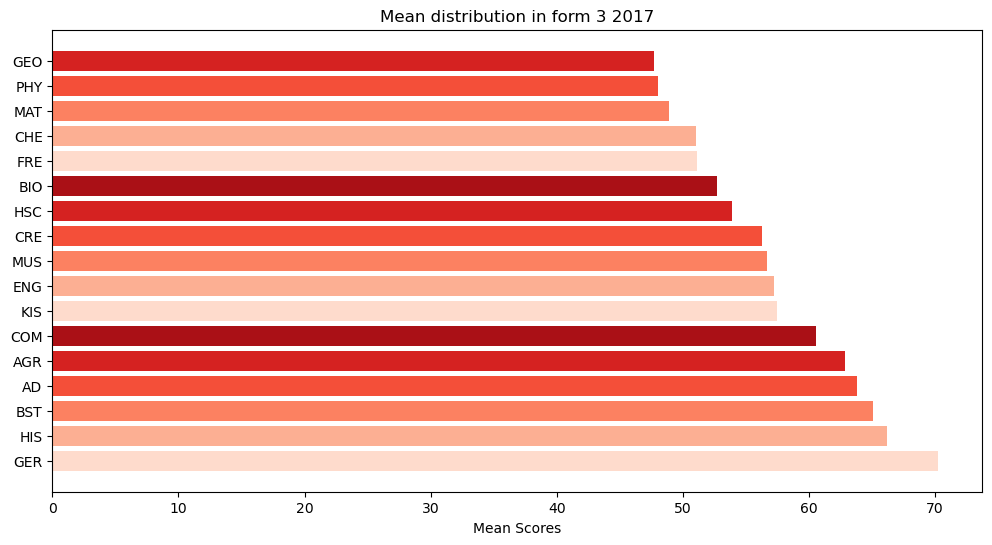

In [26]:

#subject names and their corresponding means
subjects = ["ENG", "KIS", "MAT", "BIO", "PHY", "CHE", "HIS", "GEO", "CRE", "HSC", "AD", "AGR", "COM", "FRE", "GER", "MUS", "BST"]
means = [57.25546719681908, 57.47216699801193, 48.88071570576541, 52.688866799204774, 48.04887983706721, 51.01592039800995, 66.16095890410959, 47.711217183770884, 56.2544731610338, 53.9, 63.810810810810814, 62.871428571428574, 60.55855855855856, 51.11827956989247, 70.24444444444444, 56.642857142857146, 65.08870967741936]

# Sorting subjects and means in descending order of means
sorted_subjects, sorted_means = zip(*sorted(zip(subjects, means), key=lambda x: x[1], reverse=True))

# Creating a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(sorted_subjects, sorted_means, color=sns.color_palette("Reds"))
plt.xlabel("Mean Scores")
plt.title("Mean distribution in form 3 2017")


plt.show()

